In [1]:
import sys
print(sys.executable)

C:\Users\anujk\Documents\MIT\mit3year\ML_project\myenv\Scripts\python.exe


In [2]:
import librosa
import numpy as np
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import seaborn as sns

### Loading Dataset

In [3]:
# Load audio
audio_path = 'audio1.wav'
y, sr = librosa.load(audio_path)

### Audio Visualization

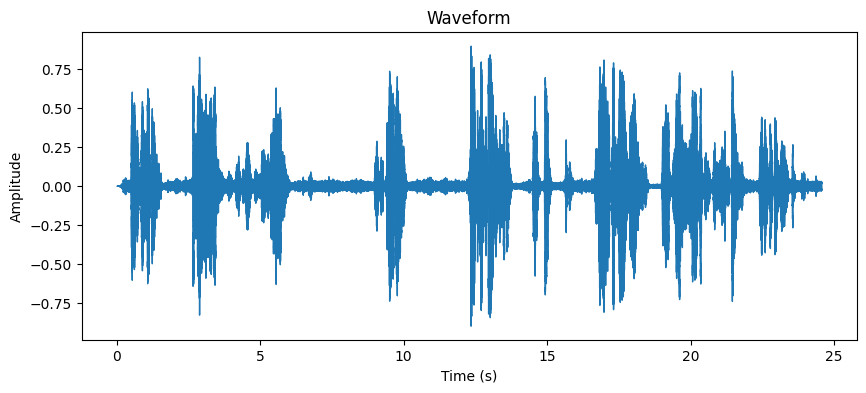

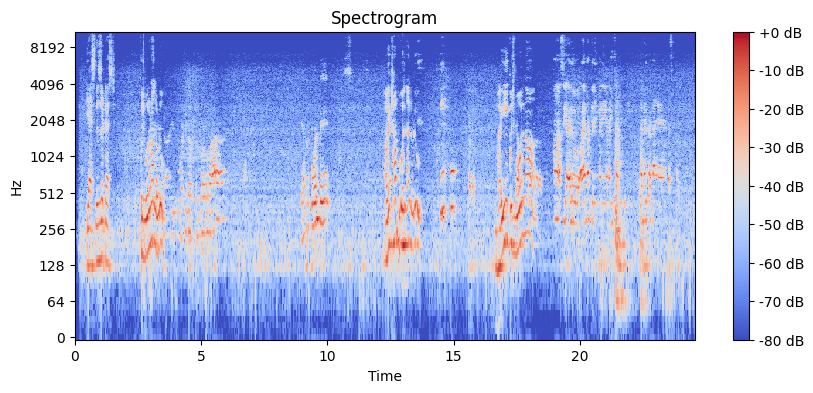

In [4]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plot spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

### Feature Extraction

In [5]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)


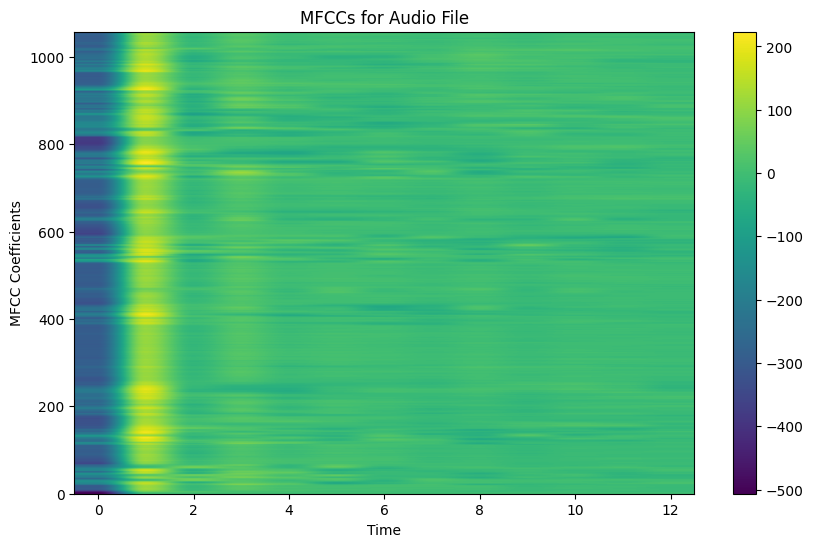

In [6]:
plt.figure(figsize=(10, 6))
plt.imshow(mfccs.T, aspect='auto', origin='lower')
plt.title('MFCCs for Audio File')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()

In [7]:
scaler = StandardScaler()
mfccs_scaled = scaler.fit_transform(mfccs.T)  # Transpose for scaling

distance_matrix = squareform(pdist(mfccs_scaled, metric='euclidean'))

### Hierarchical Clustering

C:\Users\anujk\AppData\Local\Temp\ipykernel_24036\1518652087.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


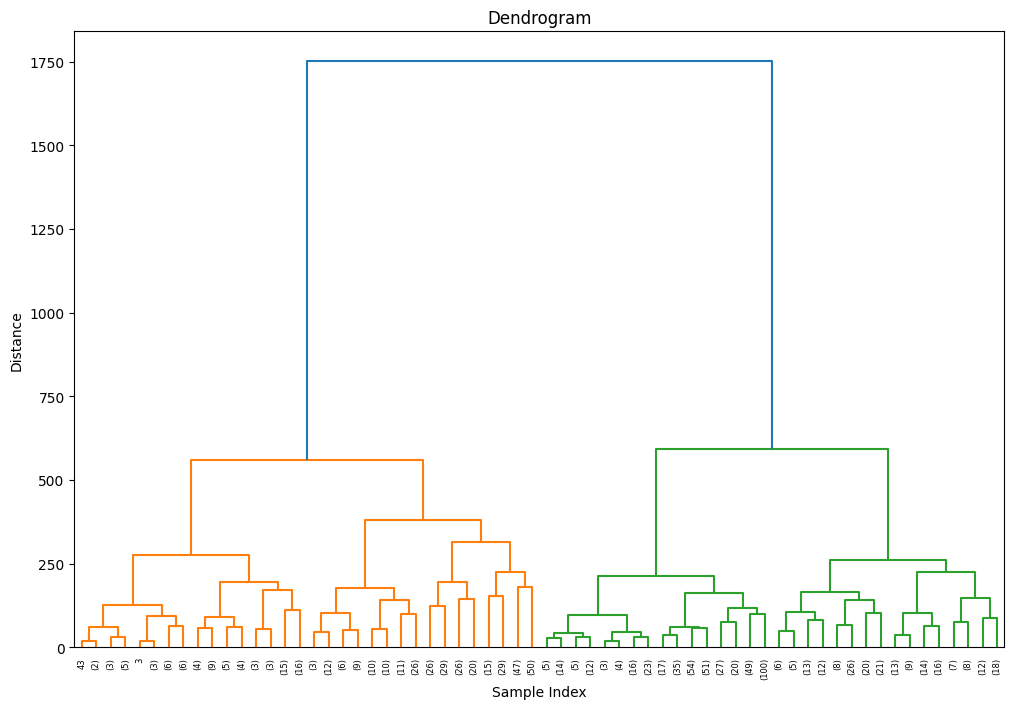

In [8]:
Z = linkage(distance_matrix, method='ward') 

plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [9]:
max_d = 570  #visually check
clusters = fcluster(Z, max_d, criterion='distance')

print("Cluster labels:", clusters)
unique_labels, counts = np.unique(clusters, return_counts=True)

for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples")

Cluster labels: [1 1 1 ... 2 2 2]
Cluster 1: 415 samples
Cluster 2: 435 samples
Cluster 3: 208 samples


### PCA Analysis

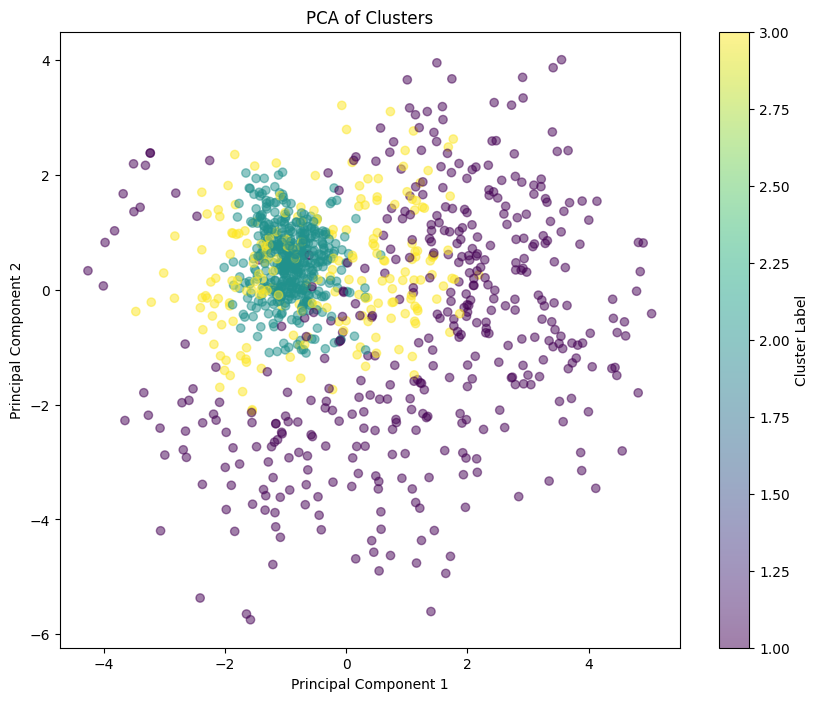

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(mfccs_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


### Centroid Visualization

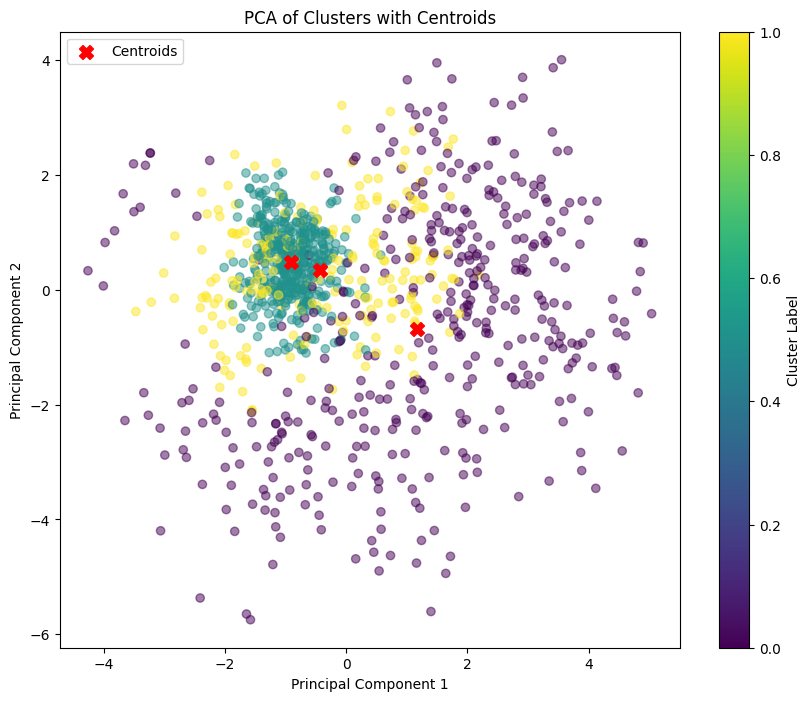

In [11]:
centroids = np.array([mfccs_scaled[clusters == i].mean(axis=0) for i in np.unique(clusters)])

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.title('PCA of Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

In [12]:
if len(clusters) == mfccs_scaled.shape[0]:
    features_df = pd.DataFrame(mfccs_scaled)
    features_df['Cluster'] = clusters
else:
    raise ValueError("Length of clusters does not match number of samples in mfccs_scaled.")


In [18]:


features_df_sorted = features_df.sort_values(by='Cluster')

heatmap_data = features_df_sorted.drop(columns='Cluster')

# Normalize the data
scaler = MinMaxScaler()
heatmap_data = pd.DataFrame(scaler.fit_transform(heatmap_data), columns=heatmap_data.columns)
palette = sns.color_palette("coolwarm", n_colors=len(np.unique(clusters)))
row_colors = features_df_sorted['Cluster'].map({i: palette[i] for i in range(len(palette))})

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
heatmap_data = pd.DataFrame(scaler.fit_transform(heatmap_data), columns=heatmap_data.columns)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Python312\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Python312\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "C:\Users\anujk\Documents\MIT\mit3year\ML_project\myenv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\anujk\Documents\MIT\mit3year\ML_project\myenv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



C:\Users\anujk\Documents\MIT\mit3year\ML_project\myenv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Python312\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Python312\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "C:\Users\anujk\Documents\MIT\mit3year\ML_project\myenv\Lib\site-packages\ipykernel_launcher.py", l

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



C:\Users\anujk\Documents\MIT\mit3year\ML_project\myenv\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1400x1200 with 0 Axes>

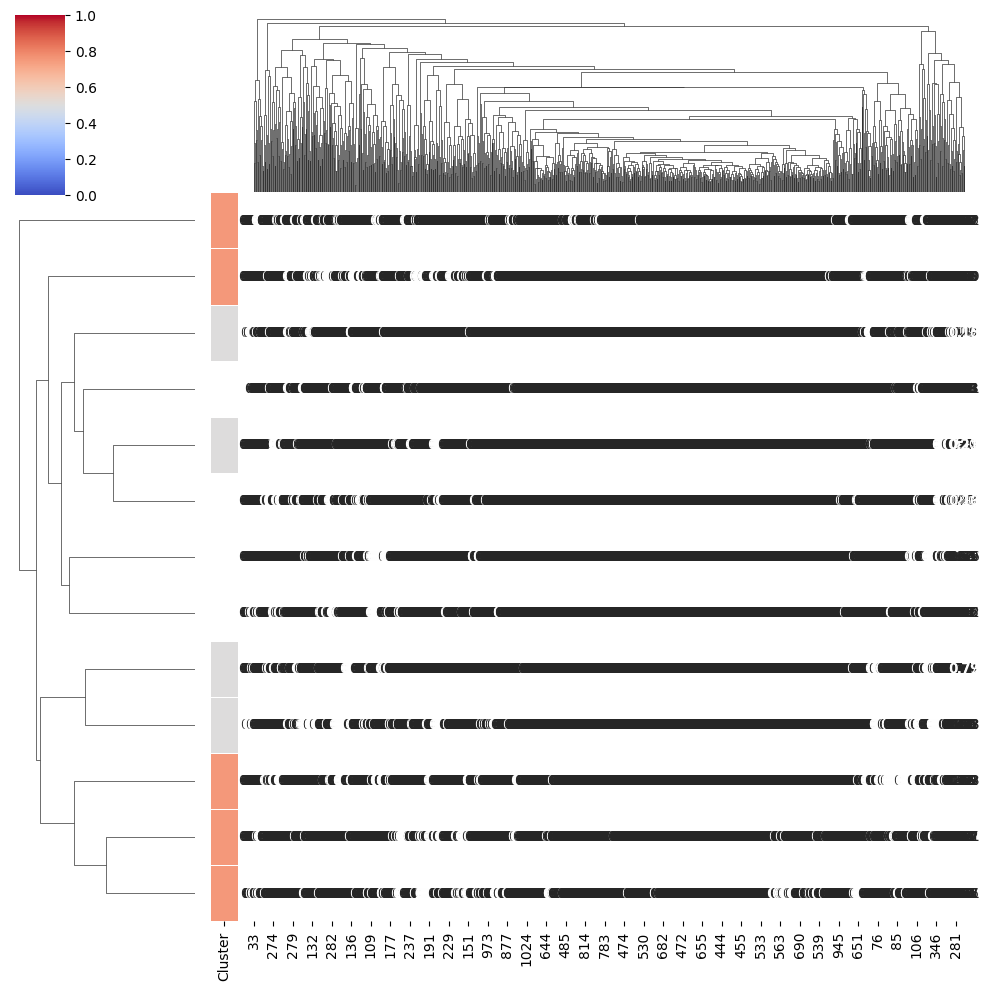

<Figure size 1400x1200 with 0 Axes>

In [19]:
sns.clustermap(
    heatmap_data.T,
    cmap='coolwarm',
    linewidths=0.5,
    row_colors=row_colors,
    yticklabels=False,
    annot=True, 
    fmt=".2f"    
)
plt.figure(figsize=(14, 12))  